# Test installations<a id="Test_installations"></a>

In [1]:
from classy_sz import Class
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy


2024-03-22 00:52:27.079533: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-22 00:52:27.079557: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-22 00:52:27.079563: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-22 00:52:27.079593: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-22 00:52:27.079612: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Amod for gg and kg

In [2]:
common_settings = {
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'sigma8': 0.831,
                   'n_s': 0.9655,
                   'tau_reio':0.0925,
}

In [3]:
path_to_dndz='/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/WISC_bin3_ngal_example'

In [4]:
%%time
M = Class()
M.set(common_settings)
M.set({
'output' : 'galn_galn_hf,galn_lens_hf',
'galaxy_samples_list_num' : 3, # the number of galaxy samples
'galaxy_samples_list' : '2,3,4', # the id string of each sample, can be any integer
'full_path_and_prefix_to_dndz_ngal':path_to_dndz
})

M.set({# class_sz parameters:
    
'skip_background_and_thermo' : 0,
'skip_hubble' : 1,
'skip_chi' : 1,
'skip_pkl' : 0,
'skip_pknl' : 0,
'skip_sigma8_and_der' : 0,
'skip_sigma8_at_z' : 1 ,
'z_min' : 0.,
'z_max' : 1.5,

'effective_galaxy_bias_ngal_0' : 1.,
'effective_galaxy_bias_ngal_1' : 1.,
'effective_galaxy_bias_ngal_2' : 1.,
   
'dlogell' : 0.1,
'ell_max' : 5000.0,
'ell_min' : 2.0,
'redshift_epsrel' : 1e-4,
'ndim_redshifts': 30,
'ngal_ngal_auto_only' : 1

        })
        
M.compute_class_szfast()


cl_galn_galn = M.cl_galn_galn()
cl_galn_lens = M.cl_galn_lens()

CPU times: user 4.79 s, sys: 134 ms, total: 4.92 s
Wall time: 1.06 s


In [5]:
amod_ar = np.linspace(-3.,0.,5)
cl_gg_all = []
cl_gk_all = []
for amod in amod_ar:
    print(amod)
    M.set({'output' : 'galn_galn_hf,galn_lens_hf',})

    M.set({'Amod':amod,
           'use_Amod':1,
           'use_pkl_in_linbias_calc':1})
    M.compute_class_szfast()
    cl_gg_all.append(M.cl_galn_galn())
    cl_gk_all.append(M.cl_galn_lens())

-3.0
-2.25
-1.5
-0.75
0.0


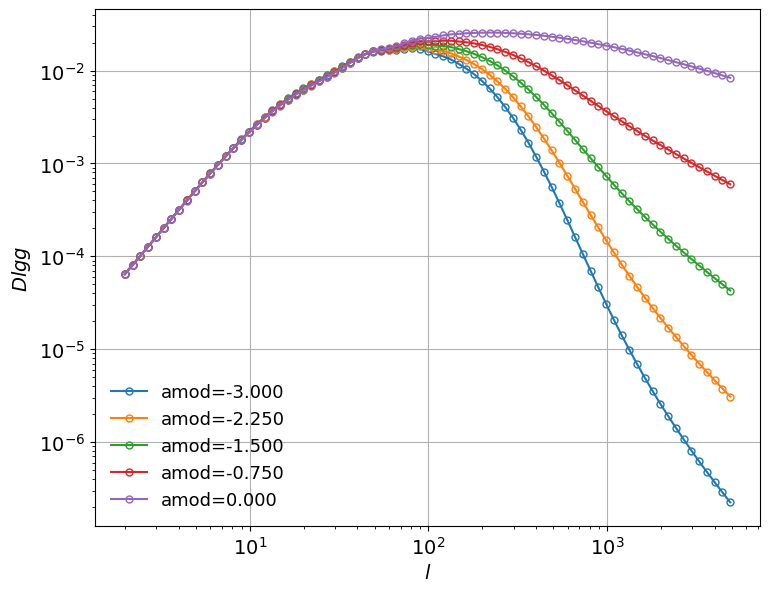

In [6]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))

for ia,amod in enumerate(amod_ar):
    cl_gg = cl_gg_all[ia]['3x3']
    l = np.asarray(cl_gg['ell'])
    cl_gg_hf = np.asarray(cl_gg['hf'])
    plt.plot(l,cl_gg_hf,
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='-',
                label=r'amod=%.3f'%amod)



plt.xlabel('$l$', fontsize=14)
plt.ylabel('$Dlgg$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()

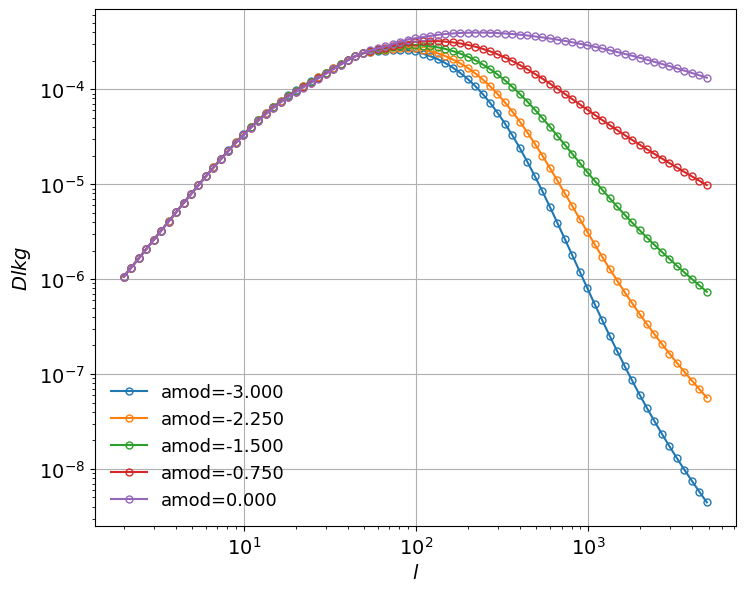

In [7]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))

for ia,amod in enumerate(amod_ar):
    cl_gk = cl_gk_all[ia]['3']
    l = np.asarray(cl_gk['ell'])
    cl_gk_hf = np.asarray(cl_gk['hf'])
    plt.plot(l,cl_gk_hf,
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='-',
                label=r'amod=%.3f'%amod)



plt.xlabel('$l$', fontsize=14)
plt.ylabel('$Dlkg$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()

# With Hang & Peacock model

In [9]:
%%time
M = Class()
M.set(common_settings)
M.set({
'output' : 'galn_galn_hf,galn_lens_hf',
'galaxy_samples_list_num' : 3, # the number of galaxy samples
'galaxy_samples_list' : '2,3,4', # the id string of each sample, can be any integer
'full_path_and_prefix_to_dndz_ngal':path_to_dndz
})

M.set({# class_sz parameters:
    
'skip_background_and_thermo' : 0,
'skip_hubble' : 1,
'skip_chi' : 1,
'skip_pkl' : 0,
'skip_pknl' : 0,
'skip_sigma8_and_der' : 0,
'skip_sigma8_at_z' : 1 ,
'z_min' : 0.,
'z_max' : 1.5,

'effective_galaxy_bias_ngal_0' : 1.,
'effective_galaxy_bias_ngal_1' : 1.,
'effective_galaxy_bias_ngal_2' : 1.,
   
'dlogell' : 0.1,
'ell_max' : 5000.0,
'ell_min' : 2.0,
'redshift_epsrel' : 1e-4,
'ndim_redshifts': 30,
'ngal_ngal_auto_only' : 1

        })
M.set({'use_nlbias': 1,
       'effective_galaxy_bias_nl_ngal_0' : -11.,
       'effective_galaxy_bias_nl_ngal_1' : -11.,
       'effective_galaxy_bias_nl_ngal_2' : -11.,
       'use_pkl_in_linbias_calc':0})


M.compute_class_szfast()


cl_galn_galn = M.cl_galn_galn()
cl_galn_lens = M.cl_galn_lens()

CPU times: user 4.78 s, sys: 83.7 ms, total: 4.87 s
Wall time: 1.03 s


In [11]:
amod_ar = np.linspace(-3.,0.,5)
cl_gg_all = []
cl_gk_all = []
for amod in amod_ar:
    print(amod)
    M.set({'output' : 'galn_galn_hf,galn_lens_hf',})

    M.set({'Amod':amod,
           'use_Amod':1,
           'use_pkl_in_linbias_calc':0})
    M.compute_class_szfast()
    cl_gg_all.append(M.cl_galn_galn())
    cl_gk_all.append(M.cl_galn_lens())

-3.0
-2.25
-1.5
-0.75
0.0


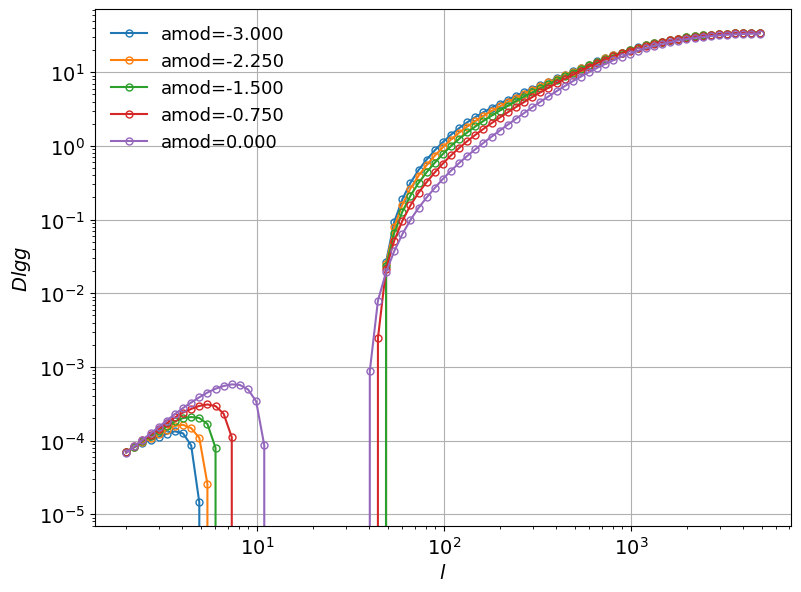

In [12]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))

for ia,amod in enumerate(amod_ar):
    cl_gg = cl_gg_all[ia]['3x3']
    l = np.asarray(cl_gg['ell'])
    cl_gg_hf = np.asarray(cl_gg['hf'])
    plt.plot(l,cl_gg_hf,
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='-',
                label=r'amod=%.3f'%amod)



plt.xlabel('$l$', fontsize=14)
plt.ylabel('$Dlgg$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()

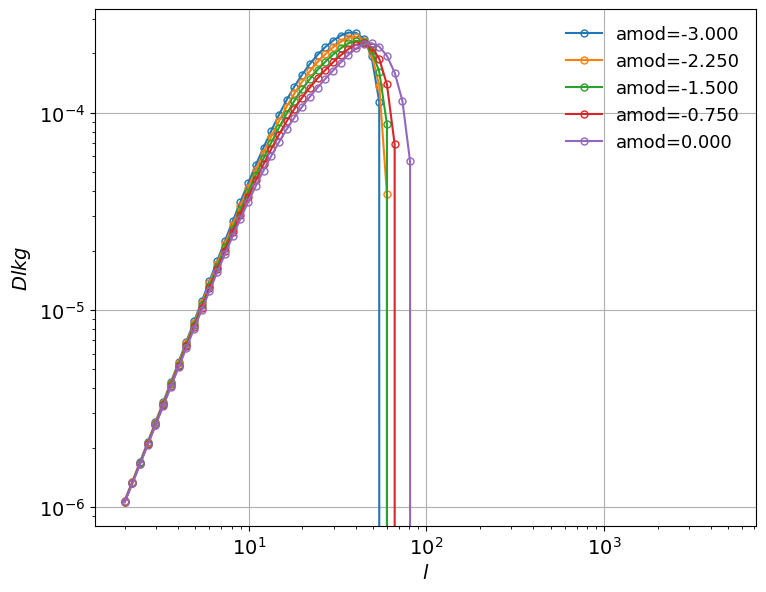

In [13]:
# color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

plt.figure(figsize=(8,6))

for ia,amod in enumerate(amod_ar):
    cl_gk = cl_gk_all[ia]['3']
    l = np.asarray(cl_gk['ell'])
    cl_gk_hf = np.asarray(cl_gk['hf'])
    plt.plot(l,cl_gk_hf,
                marker='o',
                markersize=5.,
                fillstyle='none',
                ls='-',
                label=r'amod=%.3f'%amod)



plt.xlabel('$l$', fontsize=14)
plt.ylabel('$Dlkg$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')
plt.show()